# 数据降维

前面我们讲到了K-means的聚类，但是在解决复杂的问题的时候，我们一般不会第一步就是用K-means，而是先用手段提取有用的数据。

无论在监督学习还是无监督学习下，我们都希望能提取到有代表性的，能最大程度保留数据本身的特征，这一操作叫做**数据降维(dimensionality reduction)**

接下来我们来介绍最经典的数据降维算法 **主成分分析(principal component analysis,PCA)**

PCA的主要目标是将原始数据从d维降到k维（通常k ≪ d），在此过程中提取出最能**保留原始数据方差**信息的k个正交方向。

降维后的特征（主成分）彼此**线性无关**，

## 基于特征分解法求解 PCA

PCA（主成分分析）的核心目标是找到一组正交基，将数据投影到这些基上，使得投影后的方差最大化。以下是基于特征分解法求解 PCA 的详细总结：

---

#### **1. 问题背景**
- 假设我们有 $ m $ 个样本，每个样本有 $ d $ 个特征，数据矩阵为 $ X \in \mathbb{R}^{m \times d} $。
- 目标是找到一个低维空间，使得数据在该空间中的投影能够保留尽可能多的方差。

---

#### **2. 样本在方向上的投影**
- 设 $ u $ 是一个单位向量（即 $ \|u\| = 1 $），表示投影的方向。
- 样本 $ x_i $ 在方向 $ u $ 上的投影为：
  $$
  w_i = x_i^T u
  $$
- 所有样本在方向 $ u $ 上的方差为：
  $$
  \sigma_u = \frac{1}{m} \sum_{i=1}^m (x_i^T u)^2
  $$

---

#### **3. 方差的矩阵形式**
- 将方差公式展开：
  $$
  \sigma_u = \frac{1}{m} \sum_{i=1}^m (x_i^T u)^2 = \frac{1}{m} \sum_{i=1}^m u^T x_i x_i^T u
  $$
- 提取公因式 $ u^T $ 和 $ u $：
  $$
  \sigma_u = u^T \left( \frac{1}{m} \sum_{i=1}^m x_i x_i^T \right) u
  $$
- 定义协方差矩阵 $ \Sigma $：
  $$
  \Sigma = \frac{1}{m} \sum_{i=1}^m x_i x_i^T
  $$
- 因此，方差可以写为：
  $$
  \sigma_u = u^T \Sigma u
  $$

---

#### **4. 特征分解与协方差矩阵**
- 协方差矩阵 $ \Sigma $ 是一个对称半正定矩阵，可以进行特征分解：
  $$
  \Sigma = Q \Lambda Q^T
  $$
  其中：
  - $ Q $ 是由 $ \Sigma $ 的特征向量构成的正交矩阵。
  - $ \Lambda = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_d) $ 是特征值构成的对角矩阵，且 $ \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d \geq 0 $。

---

#### **5. 最大方差方向**
- 我们希望找到单位向量 $ u $，使得 $ u^T \Sigma u $ 最大。
- 利用特征分解，设 $ u $ 可以表示为特征向量的线性组合：
  $$
  u = \sum_{i=1}^d \alpha_i e_i
  $$
  其中 $ e_i $ 是 $ \Sigma $ 的特征向量，$ \alpha_i $ 是系数。
- 计算 $ u^T \Sigma u $：
  $$
  u^T \Sigma u = (\sum_{i=1}^d \alpha_i e_i)^T \Sigma (\sum_{j=1}^d \alpha_j e_j)
  $$
  利用 $ \Sigma e_i = \lambda_i e_i $ 和 $ e_i^T e_j = \delta_{ij} $（正交性），可得：
  $$
  u^T \Sigma u = \sum_{i=1}^d \lambda_i \alpha_i^2
  $$
- 同时，由于 $ u $ 是单位向量，满足：
  $$
  \|u\|^2 = u^T u = \sum_{i=1}^d \alpha_i^2 = 1
  $$

---

#### **6. 优化问题**
- 问题转化为：
  $$
  \max_u \quad u^T \Sigma u = \sum_{i=1}^d \lambda_i \alpha_i^2, \quad \text{s.t.} \quad \sum_{i=1}^d \alpha_i^2 = 1
  $$
- 解决方法：
  - 为了使 $ u^T \Sigma u $ 最大化，应让 $ \alpha_1 = 1 $（对应最大特征值 $ \lambda_1 $），其余 $ \alpha_i = 0 $。
  - 因此，第一个主成分方向就是 $ \Sigma $ 的最大特征值对应的特征向量 $ e_1 $。

---

#### **7. 多个主成分**
- 类似地，第二个主成分方向是 $ \Sigma $ 的第二大特征值对应的特征向量 $ e_2 $，依此类推。
- 如果需要降维到 $ k $ 维，选择前 $ k $ 个最大特征值对应的特征向量 $ e_1, e_2, \ldots, e_k $，组成矩阵 $ W \in \mathbb{R}^{d \times k} $：
  $$
  W = [e_1, e_2, \ldots, e_k]
  $$
- 数据降维后的结果为：
  $$
  Z = X W
  $$

---



## 基于主成分分析的点成分降维

数据集大小: 500


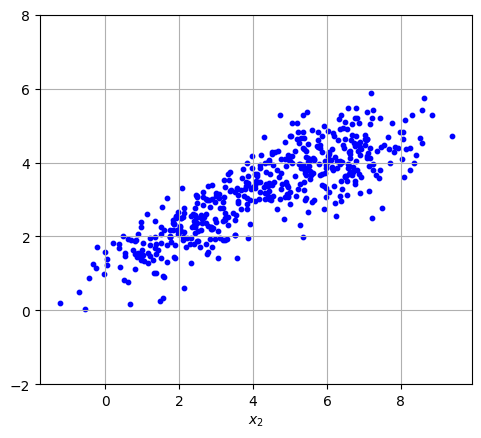

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#读取数据集
data=np.loadtxt('PCA_dataset.csv',delimiter=',')
print("数据集大小:",len(data))


plt.figure()
plt.scatter(data[:,0],data[:,1],color='blue',s=10)
plt.axis('square')  #将坐标轴设置为“正方形”比例（equal scaling）
plt.ylim(-2,8)    #手动设置y轴的显示范围,从-2到8
plt.grid()   #在图像中添加网格线
plt.xlabel(r'$x_1$')
plt.xlabel(r'$x_2$')
plt.show()

In [ ]:
def pca(X,k):
    n_samples,n_features=X.shape
    if n_features<k:
        print("k应该小于特征数")
        return X,None
    
    #中心化
    X=X-np.mean(X,axis=0)

    #计算协方差矩阵
    cov=X.T @ X
    #计算特征值和特征向量
    eig_values,eig_vectors=np.linalg.eig(cov)
    #获取最大的k个特征值的下标
    idx=np.argsort(-eig_values)[:k] #argsort从小到大，所以取反，从大到小 
    #对应的特征向量 
    W=eig_vectors[:,idx]

    #降维 
    X=X@W
    return X,W

变换矩阵:
 [[ 0.90322448 -0.42916843]
 [ 0.42916843  0.90322448]]


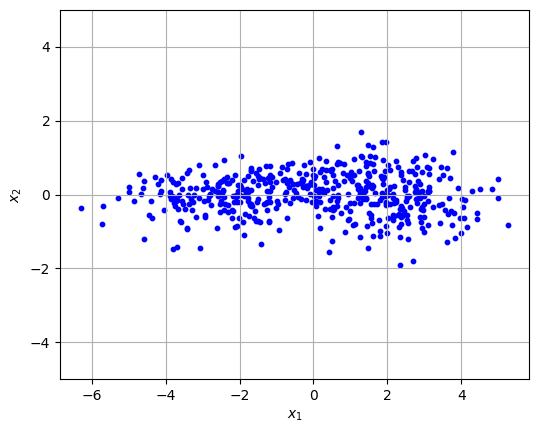

In [11]:
X,W=pca(data,2) #k = n_features ,PCA 不会降维，只是对数据进行了一个正交变换（旋转） ，用于提取主成分方向，方便后续分析或可视化。 

print("变换矩阵:\n",W)

# 绘图
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='blue', s=10)
plt.axis('square')
plt.ylim(-5, 5)
plt.grid()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

### Sklearn库的PCA

sklearn计算的变换矩阵：
 [[-0.90322448  0.42916843]
 [-0.42916843 -0.90322448]]


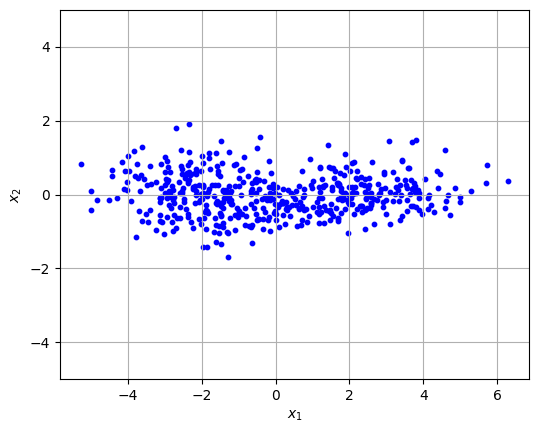

In [9]:
from sklearn.decomposition import PCA

# 中心化
X = data - np.mean(data, axis=0)
pca_res = PCA(n_components=2).fit(X)  #这里采用的是奇异值分解（SVD）的算法
W = pca_res.components_.T
print ('sklearn计算的变换矩阵：\n', W)
X_pca = X @ W

# 绘图
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', s=10)
plt.axis('square')
plt.ylim(-5, 5)
plt.grid()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()